## Business Case -

Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("auto_imports.csv")

### Basic Checks

In [3]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
df.tail()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
df.shape

(200, 26)

In [6]:
pd.set_option('display.max_column',None)

In [7]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [8]:
# Adding column names to the dataframe

In [9]:
df = pd.read_csv("Data/auto_imports.csv", names=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price'] )

In [10]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data preprocessing

In [11]:
df2 = df.copy()

In [12]:
# Replacing '?' with Na which will be easy for analysis

In [13]:
df2.replace('?',pd.NA, inplace=True)

In [14]:
# Finding null values in the dataframe

In [15]:
df2.isnull().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       199 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

## Converting Categorical variables

In [17]:
df2['num_of_doors'].unique()

array(['two', 'four', <NA>], dtype=object)

In [18]:
df2['num_of_cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [19]:
mapping = {'two':2,'four':4}
df2['num_of_doors'].replace(mapping, inplace = True) 

In [20]:
mapping = {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
df2['num_of_cylinders'].replace(mapping, inplace=True)

In [21]:
df2['bore'] = pd.to_numeric(df2['bore'],errors='coerce').dropna().astype(float)

In [22]:
df2['stroke'] = pd.to_numeric(df2['stroke'],errors='coerce').dropna().astype(float)

In [23]:
df2['horsepower'] = pd.to_numeric(df2['horsepower'],errors='coerce').dropna().astype(int)

In [24]:
df2['num_of_doors'] = pd.to_numeric(df2['num_of_doors'],errors='coerce').dropna().astype(int)

In [25]:
df2['peak_rpm'] = pd.to_numeric(df2['peak_rpm'],errors='coerce').dropna().astype(int)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       199 non-null    float64
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    int64  
 16  engine_size        201 non

In [27]:
df2.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,<NA>,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,<NA>,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,<NA>,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Handling missing values

In [28]:
df2[df2['num_of_doors'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
26,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,4,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
60,0,<NA>,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,4,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795


In [29]:
df2['num_of_doors'].unique()

array([ 2.,  4., nan])

In [30]:
df2.loc[df2['num_of_doors'].isnull()==True,'num_of_doors'] 

26   NaN
60   NaN
Name: num_of_doors, dtype: float64

In [31]:
df2['num_of_doors'].mode()

0    4.0
Name: num_of_doors, dtype: float64

In [32]:
df2.loc[df2['num_of_doors'].isnull()==True,'num_of_doors'] = df2['num_of_doors'].mode()[0]

In [33]:
df2.loc[df2['num_of_doors'].isnull()==True,'num_of_doors'] 

Series([], Name: num_of_doors, dtype: float64)

In [34]:
#df2['num_of_doors'] = df2['num_of_doors'].fillna(df2['num_of_doors'].mode()[0])

In [35]:
df2[df2['bore'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
52,3,150,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945
53,3,150,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845
54,3,150,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645
55,3,150,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645


In [36]:
df2['bore'].mean()

3.330710659898477

In [37]:
df2.loc[df2['bore'].isnull()==True,'bore'] = df2['bore'].mean()

In [38]:
df2[df2['bore'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [39]:
df2[df2['stroke'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
52,3,150,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,3.330711,NaN,9.4,101.0,6000.0,17,23,10945
53,3,150,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,3.330711,NaN,9.4,101.0,6000.0,17,23,11845
54,3,150,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2,70,4bbl,3.330711,NaN,9.4,101.0,6000.0,17,23,13645
55,3,150,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2,80,mpfi,3.330711,NaN,9.4,135.0,6000.0,16,23,15645


In [40]:
df2['stroke'].mean()

3.256903553299492

In [41]:
df2.loc[df2['stroke'].isnull()==True,'stroke'] = df2['stroke'].mean()

In [42]:
df2[df2['stroke'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [43]:
df2[df2['horsepower'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
126,0,<NA>,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,4,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
127,2,<NA>,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,4,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


In [44]:
df2.horsepower.median()

95.0

In [45]:
df2.loc[df2['horsepower'].isnull()==True,'horsepower'] = df2['horsepower'].median()

In [46]:
df2[df2['horsepower'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [47]:
df2[df2['peak_rpm'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
126,0,<NA>,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,4,132,mpfi,3.46,3.9,8.7,95.0,NaN,23,31,9295
127,2,<NA>,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,4,132,mpfi,3.46,3.9,8.7,95.0,NaN,23,31,9895


C:\Users\samee\AppData\Local\Temp\ipykernel_18100\3694372170.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(sorted(plt.gca().get_xticklabels(), key=lambda x: x.get_text()))


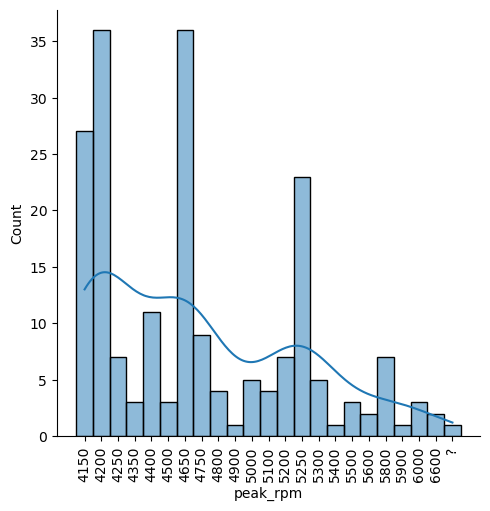

In [48]:
sns.displot(x=df.peak_rpm,kde=True)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(sorted(plt.gca().get_xticklabels(), key=lambda x: x.get_text()))
plt.show()

In [49]:
# As thsi is not a normal distribution used median to replace null values

In [50]:
df2.peak_rpm.median()

5200.0

In [51]:
df2.loc[df2['peak_rpm'].isnull()==True,'peak_rpm'] = df2['peak_rpm'].median()

In [52]:
df2[df2['peak_rpm'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       201 non-null    float64
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    int64  
 16  engine_size        201 non

C:\Users\samee\AppData\Local\Temp\ipykernel_18100\2344922718.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(sorted(plt.gca().get_xticklabels(), key=lambda x: x.get_text()))


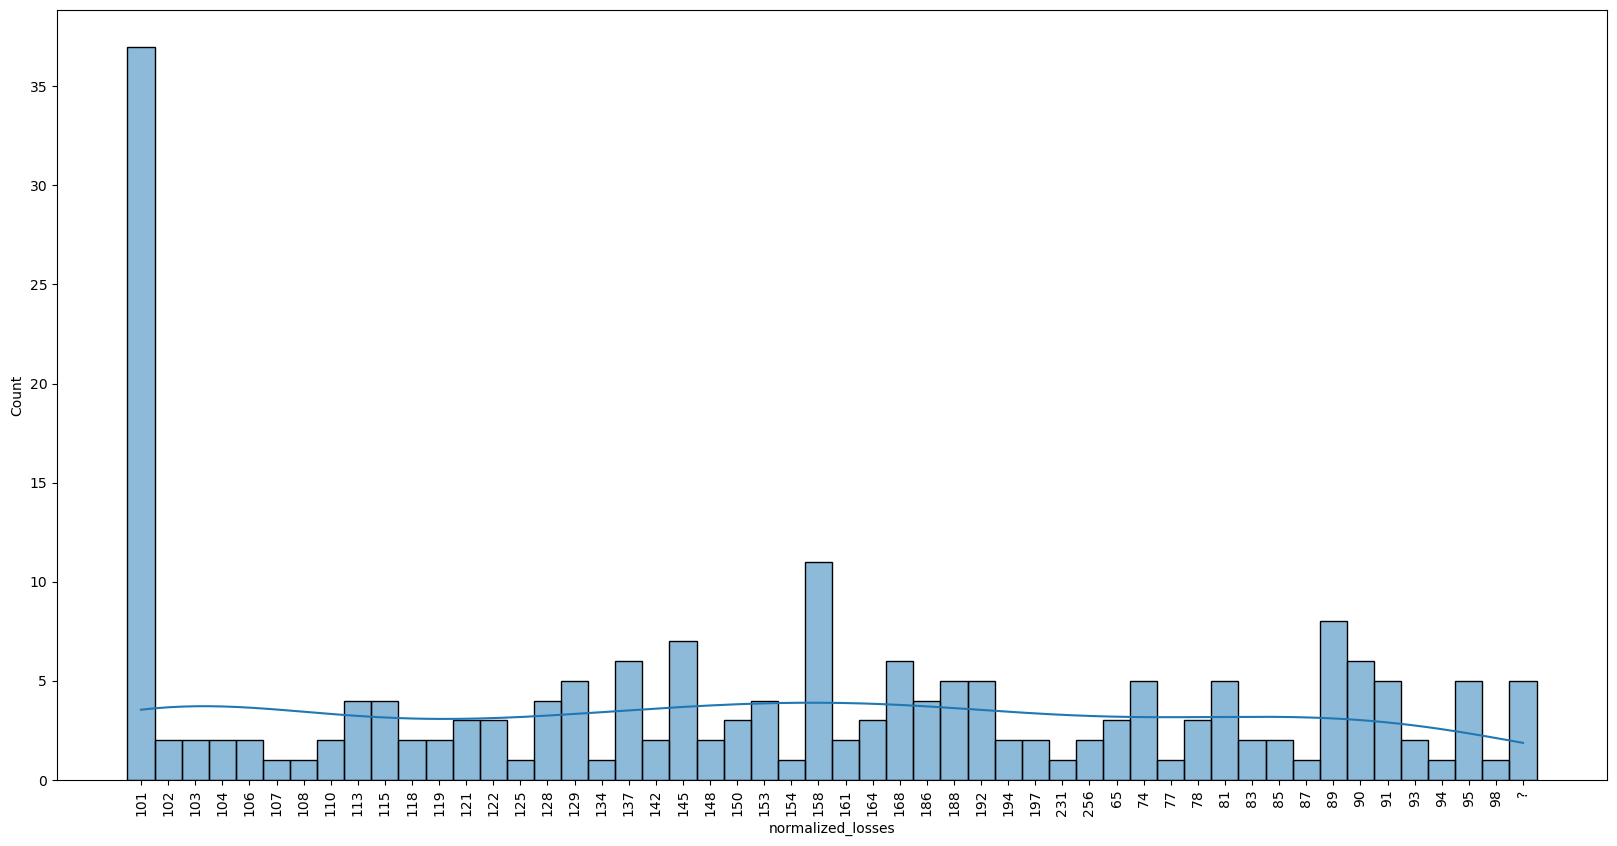

In [54]:
plt.figure(figsize=(20,10))
sns.histplot(x=df.normalized_losses, kde=True)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(sorted(plt.gca().get_xticklabels(), key=lambda x: x.get_text()))
plt.show()

In [55]:
# As thsi is not a normal distribution used median to replace null values

In [56]:
df2.normalized_losses.mode()

0    161
Name: normalized_losses, dtype: object

In [57]:
df2.normalized_losses.median()

115.0

In [58]:
df2['normalized_losses'] = pd.to_numeric(df2['normalized_losses'],errors='coerce').dropna().astype(int)

In [59]:
df2.loc[df2['normalized_losses'].isnull()==True,'normalized_losses'] = df2['normalized_losses'].median()

In [60]:
df2[df2['normalized_losses'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [61]:
df2.describe()

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,120.711443,3.144279,98.797015,174.200995,65.889055,53.766667,2555.666667,4.363184,126.875622,3.330711,3.256904,10.164279,103.313433,5118.407960,25.179104,30.686567,13207.129353
std,1.254802,32.111623,0.992008,6.066366,12.322175,2.101471,2.447822,517.296727,1.059452,41.546834,0.268072,0.316048,4.004965,37.374942,478.183493,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,2.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,4.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,4.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [62]:
df2.describe(include = 'O')

,make,fuel_type,aspiration,body_style,drive_wheels,engine_location,engine_type,fuel_system
count,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,8
top,toyota,gas,std,sedan,fwd,front,ohc,mpfi
freq,32,181,165,94,118,198,145,92


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       201 non-null    float64
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    int64  
 16  engine_size        201 non

In [64]:
import sweetviz as sv#importing sweetviz library
my_report = sv.analyze(df2)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights from univariant analysis

Among all the models 16% of car models are manufatured by TOYOTA, followed by Nissan 9% and mazda 8%.

90% Cars models are based on Gasoline and 10% cars are based on Diesel.

82% car models used standard or natural aspiration and 18% models use turbo aspiration

57% car models have 4 doors and 43% car models have 2 doors.

Most car models are Sedan type about 47%, followed by hatchback 34%.

59% car models have front wheel drive, 37% car models have rear wheel drive and only 4% car models have four wheel drive.

Almost all car models have engine at front.

60% car models have wheel base around 94-100

45% car models have length around 170-180.

80% car models have width ranging from 63.0 to 67.0.

90% cars height ranging from 51.0 to 57.0.

90% of cars curb weight is aroung 1800 to 3300.

72% of cars have ohc type of engine.

About 78% cars have 4 cylinder engines and 12% cars have 6 cylinder engines.

45% cars enigine size is around 100.

46% cars have 'mpfi' fuel system and 32% cars have 2bbl fuel system

90% of the cars engine bore sie is from 2.80 to 3.60

More than 80% cars have stroke ranging from 2.90 - 3.75.

90% cars compression ratio is between 7.0 - 10.0.

80% cars have 55-125 hp engine.

75% cars peak rpm is ranging from 4700 to 5600 rpm

Mejority of cars mileage in city ranging from 15 to 32 mpg.

Mejority of cars milage on highway is 24 to 38 mpg.

More than 60% of cars price is between 5k to 12.5k, nearly 25% cars price is ranging from 13k to 21k

## Bivariate Analysis

In [65]:
data = df2[['make','fuel_type','aspiration','body_style','drive_wheels','engine_location','engine_type','fuel_system']]

In [66]:
df2.engine_type.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

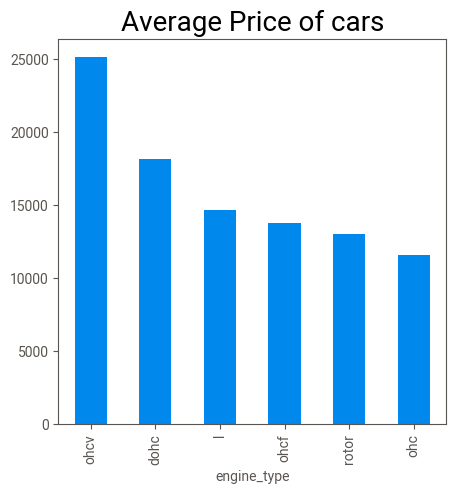

In [67]:
plt.figure(figsize=(5,5))
df2.groupby(['engine_type'])['price'].mean().sort_values(ascending = False).plot(kind='bar',fontsize=10)
plt.title('Average Price of cars', fontsize=20)
plt.show()

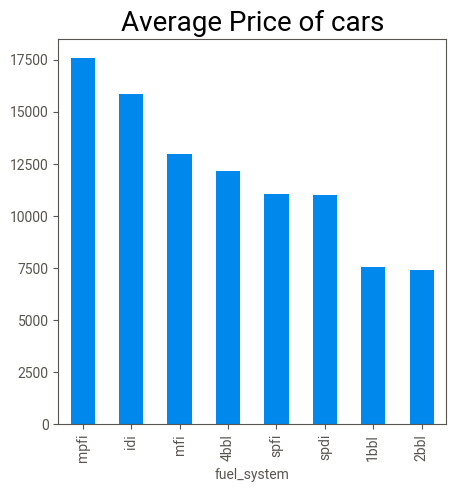

In [68]:
plt.figure(figsize=(5,5))
df2.groupby(['fuel_system'])['price'].mean().sort_values(ascending = False).plot(kind='bar',fontsize=10)
plt.title('Average Price of cars', fontsize=20)
plt.show()

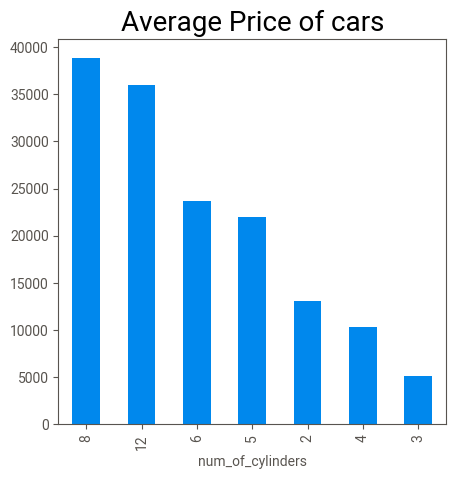

In [69]:
plt.figure(figsize=(5,5))
df2.groupby(['num_of_cylinders'])['price'].mean().sort_values(ascending = False).plot(kind='bar',fontsize=10)
plt.title('Average Price of cars', fontsize=20)
plt.show()

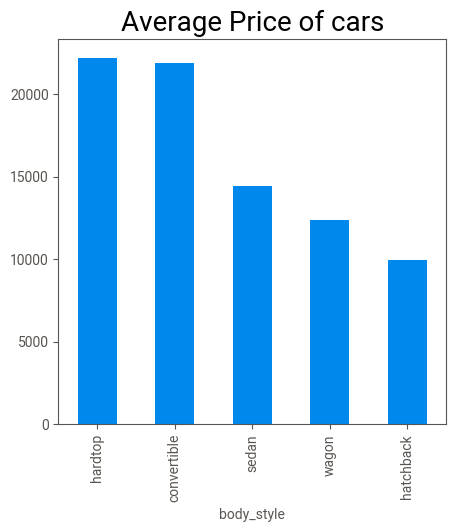

In [70]:
plt.figure(figsize=(5,5))
df2.groupby(['body_style'])['price'].mean().sort_values(ascending = False).plot(kind='bar',fontsize=10)
plt.title('Average Price of cars', fontsize=20)
plt.show()

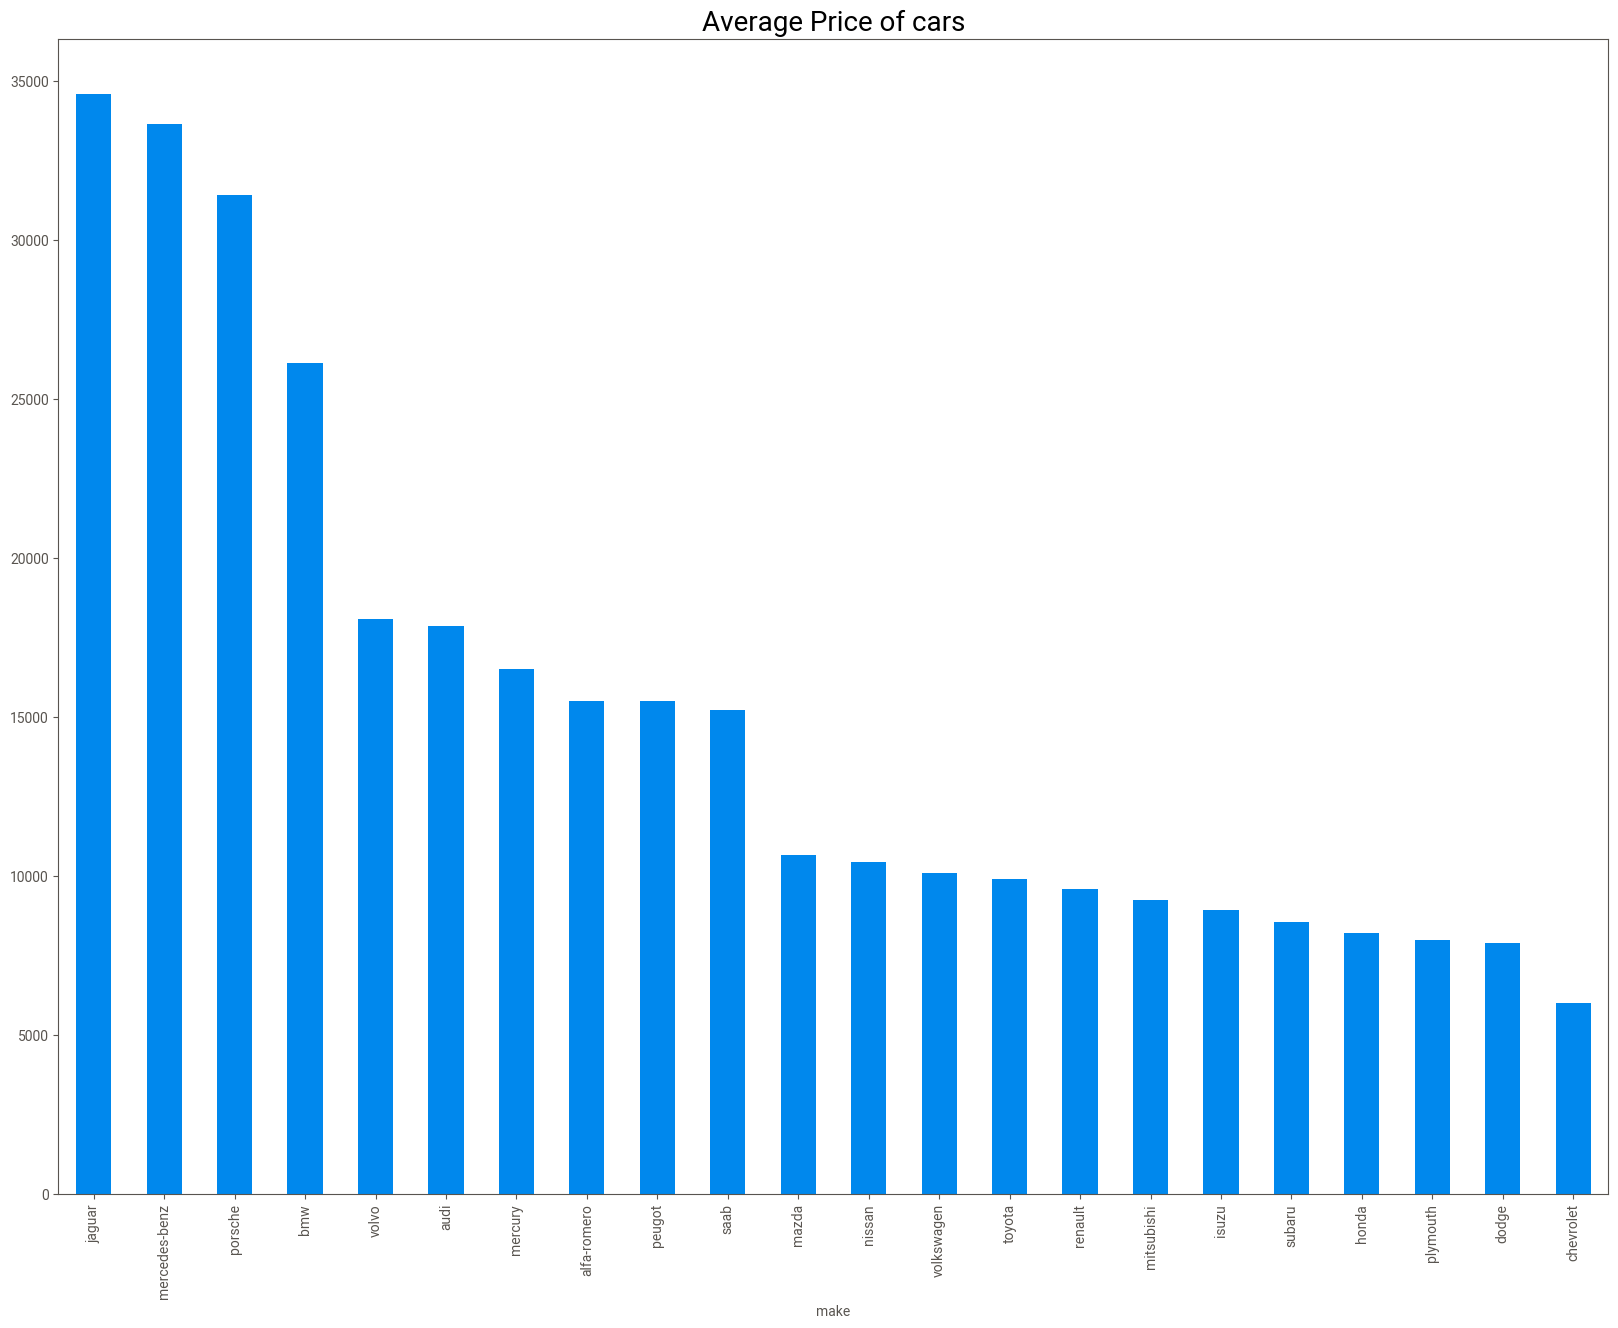

In [71]:
plt.figure(figsize=(20,15))
df2.groupby(['make'])['price'].mean().sort_values(ascending = False).plot(kind='bar',fontsize=10)
plt.title('Average Price of cars', fontsize=20)
plt.show()

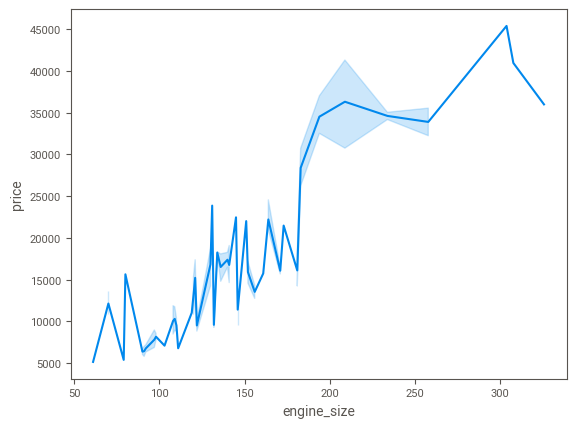

In [72]:
sns.lineplot(x ='engine_size', y='price', data=df2)
plt.show()

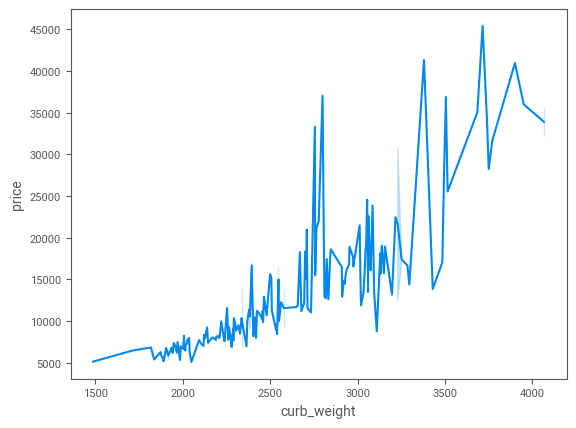

In [73]:
sns.lineplot(x ='curb_weight', y='price', data=df2)
plt.show()

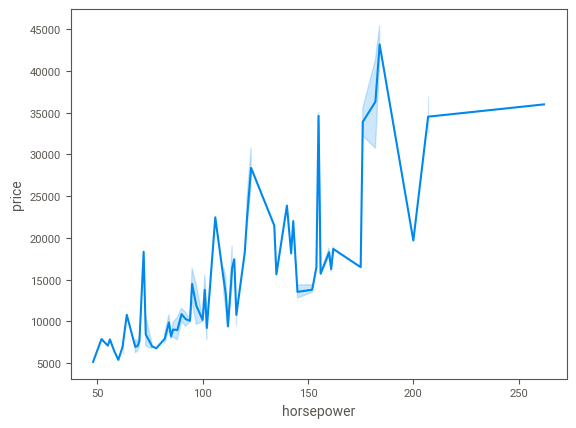

In [74]:
sns.lineplot(x ='horsepower', y='price', data=df2)
plt.show()

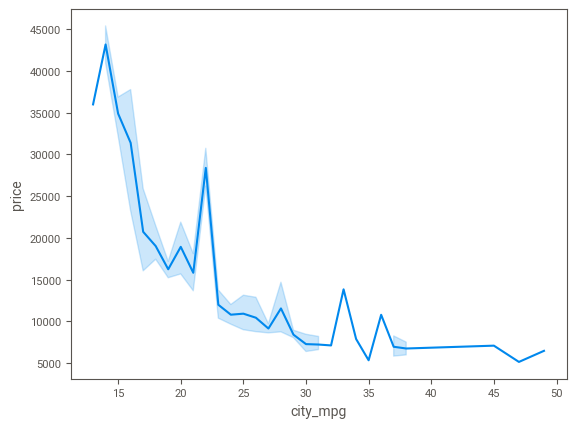

In [75]:
sns.lineplot(x ='city_mpg', y='price', data=df2)
plt.show()

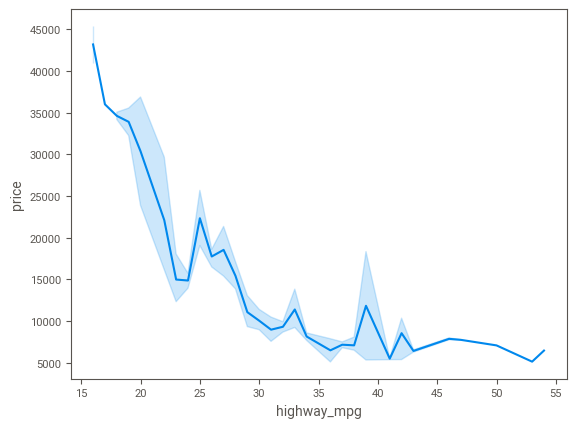

In [76]:
sns.lineplot(x ='highway_mpg', y='price', data=df2)
plt.show()

### Insights from bivariate analysis

1)	The average price of the ‘ohcv’ engine type cars is 25000, then second highest average price cars is around 18000 which use ‘dohc’ engines. Average price of cars with ‘ohc’ engines is lowest which is around 12000.

2)	Average price of cars with ‘mpfi’ fuel system is highest, around 17500, followed by ‘idi’ fuel system cars which is around 16000. ‘1bbl’ and ‘2bbl’ fuel system cars have lowest average price around 7500.

3)	Cars with 8-cylinder engine have highest average price, around 38000, followed by cars with 12-cylinder engine have around 35000. Cars with 3-cylinder engine are cheapest cars having average cost 5000.

4)	Average car price of ‘Hardtop’ and ‘Convertible’ cars are highest, around 22000. Hatchback cars are cheapest with average price of 10000.

5)	Average cost of cars manufactured by ‘Jaguar’ is highest around 35000, followed by ‘Mercedes-benz’ which is around 33000 and ‘Porsche’ with average price of 32000. Average price is lowest for cars manufactured by ‘Chevrolet’ which is around 6000.

6)	In engine size we can see upward trend, i.e. as engine size increases the price of the car increases.

7)	In curb weight feature we can positive relation, general trend is as curb weight increases car price increases.

8)	As engine horsepower increases the car price also increases.

9)	In city mileage feature we can see exponential trend, as city mileage decreases car price increase, similarly in highway mileage, as price of the car increases mileage decreases.

<Axes: >

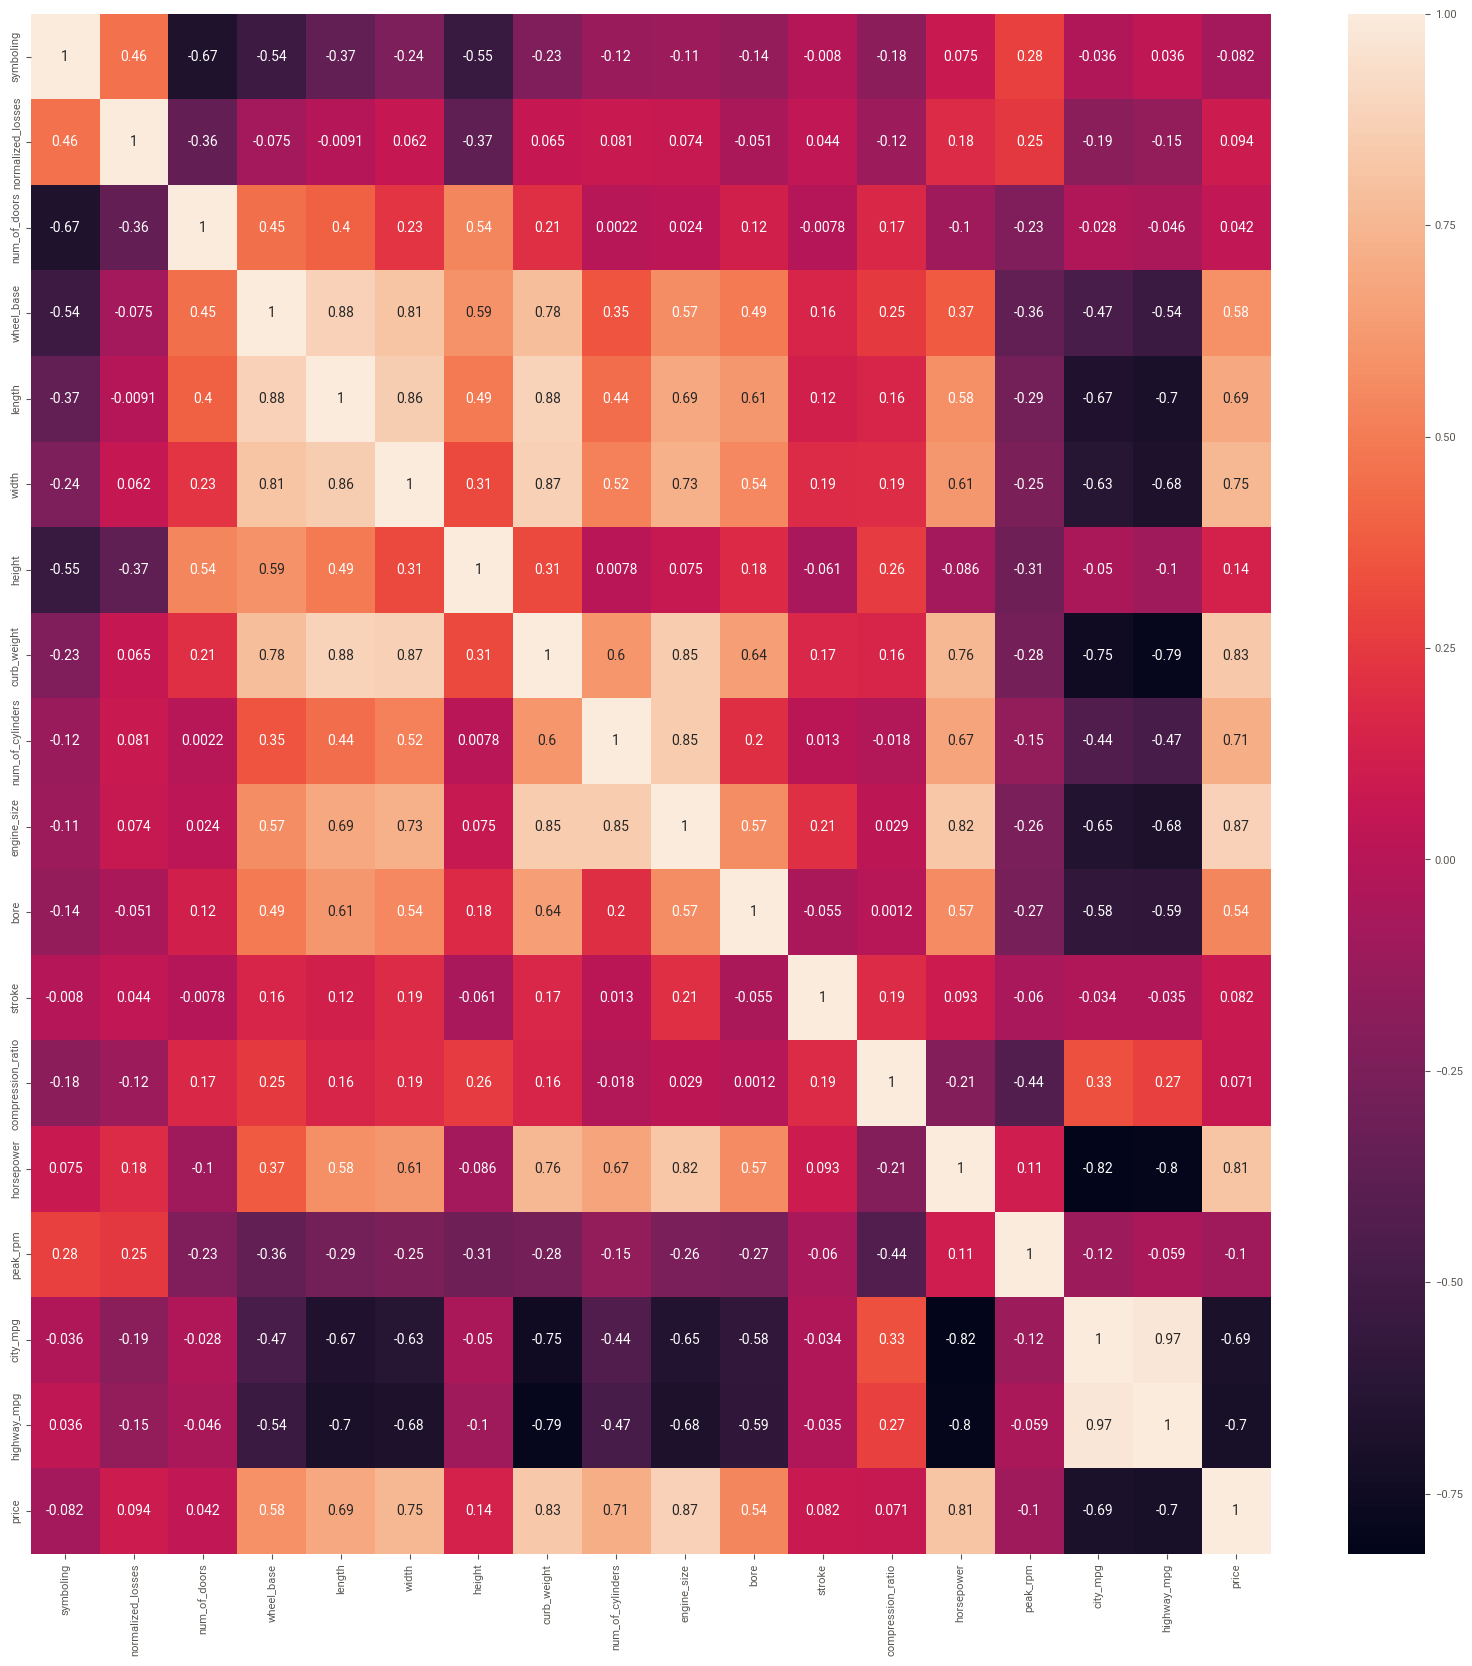

In [77]:
plt.figure(figsize=(20,20))
data = ['symboling','normalized_losses','num_of_doors','wheel_base','length','width','height','curb_weight','num_of_cylinders',
        'engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm', 'city_mpg','highway_mpg','price']
df_subset = df2[data]
sns.heatmap(df_subset.corr(),annot=True)


### Label encoding

In [78]:
df3 = df2.copy()

In [79]:
df3.head(2)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500


In [80]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df3['make'] = lc.fit_transform(df['make'])

In [81]:
df3.head(2)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,0,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,0,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500


In [82]:
df3.make.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

### Onehot encoding

In [83]:
new_df = pd.get_dummies(df3, drop_first = True)

In [84]:
new_df

,symboling,normalized_losses,make,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas,aspiration_turbo,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd,engine_location_rear,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,115.0,0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1,3,115.0,0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
2,1,115.0,0,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
3,2,164.0,1,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
4,2,164.0,1,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,21,4.0,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False
197,-1,95.0,21,4.0,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045,True,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False
198,-1,95.0,21,4.0,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
199,-1,95.0,21,4.0,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False


In [85]:
new_df.describe()

,symboling,normalized_losses,make,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,120.711443,12.298507,3.144279,98.797015,174.200995,65.889055,53.766667,2555.666667,4.363184,126.875622,3.330711,3.256904,10.164279,103.313433,5118.407960,25.179104,30.686567,13207.129353
std,1.254802,32.111623,6.253035,0.992008,6.066366,12.322175,2.101471,2.447822,517.296727,1.059452,41.546834,0.268072,0.316048,4.004965,37.374942,478.183493,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,0.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,8.000000,2.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,4.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,12.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,19.000000,4.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,21.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


## Model Creation

### Decision Tree

In [86]:
X = new_df.drop('price', axis=1)
y = new_df.price

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Scalling 

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x_train= sc.fit_transform(X_train)
scaled_x_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_x_train, columns = X.columns)
X_test = pd.DataFrame(scaled_x_test, columns = X.columns)

In [88]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [89]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [90]:
predictions = model.predict(X_test)

In [91]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

test_score = r2_score(y_test, predictions)
test_score

0.9061189406529723

In [92]:
print("MSE: " , mean_squared_error(y_test, predictions))
print("MAE: " , mean_absolute_error(y_test, predictions))

MSE:  10131011.828431373
MAE:  2064.872549019608


## Linear regression

In [93]:
X = new_df.drop('price', axis=1)
y = new_df.price
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [94]:
sc = StandardScaler()
scaled_x_train= sc.fit_transform(X_train)
scaled_x_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_x_train, columns = X.columns)
X_test = pd.DataFrame(scaled_x_test, columns = X.columns)

In [95]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [96]:
y_hat = LR.predict(X_test)

In [97]:
y_h = LR.predict(X_train)

In [98]:
from sklearn.metrics import r2_score, mean_squared_error

train_score = r2_score(y_train, y_h)
train_score

0.9293980005992266

In [99]:
test_score = r2_score(y_test, y_hat)
test_score

0.901594959945616

In [100]:
print("MSE: " , mean_squared_error(y_test, y_hat))
print("MAE: " , mean_absolute_error(y_test, y_hat))

MSE:  10619209.366641963
MAE:  2119.590808076863


In [101]:
df3.price.max()

45400

In [102]:
df3.price.min()

5118

In [103]:
import math
print(math.sqrt(mean_squared_error(y_test, y_hat)))

3258.7128389353306


### Random Forest 

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
X = new_df.drop('price', axis=1)
y = new_df.price

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sc = StandardScaler()
scaled_x_train= sc.fit_transform(X_train)
scaled_x_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_x_train, columns = X.columns)
X_test = pd.DataFrame(scaled_x_test, columns = X.columns)

X_train = np.array(X_train)
X_test = np.array(X_test)

In [106]:
rf_reg = RandomForestRegressor(n_estimators=100)#object creation ,taking 100 decision tree in random forest
rf_reg.fit(X_train,y_train)#training the data
y_predict = rf_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_predict)
print(f"MAE: {mae:.2f}")

MAE: 1778.56


In [107]:
print(math.sqrt(mean_squared_error(y_test, y_predict)))

2824.8929656494724


In [108]:
test_score = r2_score(y_test, y_predict)
test_score

0.926051536707366

In [109]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]     #List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']  #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]  #minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]    #minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_reg1 = RandomForestRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_reg1,param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)                      ##training data on randomsearch cv
rf_best_params = rf_cv.best_params_                 ##it will give you best parameters
print(f"Best paramters: {rf_best_params})")      ##printing  best parameters


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False})


In [110]:
rf_cv.best_score_

0.8798422638064795

In [111]:
#passing best parameter to randomforest
rf_reg2 = RandomForestRegressor(n_estimators = rf_best_params['n_estimators'], max_features=rf_best_params['max_features'],
               max_depth = rf_best_params['max_depth'], min_samples_split = rf_best_params['min_samples_split'],
               min_samples_leaf = rf_best_params['min_samples_leaf'], bootstrap = rf_best_params['bootstrap'])
rf_reg2.fit(X_train, y_train)#training
y_predict=rf_reg2.predict(X_test)#testing
mae = mean_absolute_error(y_test, y_predict)
print(f"MAE: {mae:.2f}")#checking performance

MAE: 1540.32


In [112]:
R2_score = r2_score(y_test, y_predict)
R2_score

0.942684370112441

In [113]:
## Trying random values of parameters

In [114]:
rf_reg2 = RandomForestRegressor(n_estimators = 600, max_features = 'sqrt', max_depth = None, min_samples_split = 2,
               min_samples_leaf = 1, bootstrap = False)   #passing best parameter to randomforest
rf_reg2.fit(X_train, y_train)#training
y_predict=rf_reg2.predict(X_test)#testing
mae = mean_absolute_error(y_test, y_predict)
print(f"MAE: {mae:.2f}")#checking performance

MAE: 1571.81


In [115]:
R2_score = r2_score(y_test, y_predict)
R2_score

0.9400162332201452

## KNN

In [116]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors as needed

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate performance (e.g., using MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 3775.68


In [117]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.6010966382837803

### Gradient Boosting

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

In [119]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error"
}

# Train the model
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

# Evaluate performance (mean squared error on test set)
y_hat = reg.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")
mae = mean_absolute_error(y_test, y_hat)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE) on test set: 7016066.4656
Mean Absolute Error (MAE): 1723.26


In [120]:
R2_score = r2_score(y_test, y_hat)
R2_score

0.9349842085476497

### Hyperparameter tuning

In [121]:
from sklearn.model_selection import RandomizedSearchCV

learning_rate = np.linspace(0.01, 0.3, 10)
max_depth = [3,4,5,6,7,8]
n_estimators = [100,200,300,400,500]
min_samples_split =[2,3,4,5,6,7]
loss = ['squared_error', 'absolute_error', 'huber', 'quantile']

param_dist = {
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'n_estimators': n_estimators,
    'min_samples_split':min_samples_split,
    'loss':loss
}

# Create 
grad_model = GradientBoostingRegressor(**params)
grad_model.fit(X_train, y_train)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    grad_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    cv=5,       # Cross-validation folds
    verbose=1,
    n_jobs=-1   # Use all available CPU cores
)

# Fit to your training data
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

# Print the best parameters
print("Best hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters:
n_estimators: 200
min_samples_split: 2
max_depth: 4
loss: huber
learning_rate: 0.10666666666666666


In [122]:
# Using best hyperparameters for model creation

# Train the model
reg = GradientBoostingRegressor(n_estimators = best_params['n_estimators'], max_depth = best_params['max_depth'], min_samples_split = best_params['min_samples_split'],
            learning_rate = best_params['learning_rate'], loss = best_params['loss'])
reg.fit(X_train, y_train)

# Evaluate performance (mean squared error on test set)
y_hat = reg.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")
mae = mean_absolute_error(y_test, y_hat)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE) on test set: 10530771.9045
Mean Absolute Error (MAE): 1925.48


In [123]:
R2_score = r2_score(y_test, y_hat)
R2_score

0.9024144834814205

In [124]:
# Using random hyperparameters for model creation

params = {
    "n_estimators": 100,
    "max_depth": 2,
    "min_samples_split": 6,
    "learning_rate": 0.2033,
    "loss": "huber"
}

# Train the model
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

# Evaluate performance (mean squared error on test set)
y_hat = reg.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")
mae = mean_absolute_error(y_test, y_hat)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE) on test set: 7545673.4790
Mean Absolute Error (MAE): 1794.74


In [125]:
R2_score = r2_score(y_test, y_hat)
R2_score

0.9300764986068749

### XGBoost

In [126]:
from xgboost import XGBRegressor

In [127]:
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate performance (e.g., using mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

Mean Squared Error (MSE) on test set: 6260743.2860


In [128]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1527.80


In [129]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.9419835627529617

### Hyperparameter tuning

In [130]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': [3, 4, 5, 6,7,8],
    'n_estimators': [100, 200, 300, 400],
    'gamma':[0,1,2,3,4],
    'objective':['reg:squaredlogerror','reg:squarederror']
}

# Create XGBRegressor
xgb_model = XGBRegressor()

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=5,       # Cross-validation folds
    verbose=1,
    n_jobs=-1   # Use all available CPU cores
)

# Fit to training data
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

# Print the best parameters
print("Best hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters:
objective: reg:squarederror
n_estimators: 400
max_depth: 4
learning_rate: 0.23555555555555557
gamma: 0


In [131]:
xgb_regressor = XGBRegressor(objective = 'reg:squarederror',
                        n_estimators = 300,
                        max_depth = 3,
                        learning_rate = 0.1388,
                        gamma = 2)
#xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate performance (e.g., using mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")


Mean Squared Error (MSE) on test set: 6232373.0203


In [132]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.9422464615285291

In [133]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1520.10


### Model Comparison Report

1) Decision Tree model

r2_score = 0.9061

Mean Absolute Error (MAE) = 2064.87

2) Linear regression model

r2_score = 0.9015

MAE = 2119.59

3) Random Forest Model

r2_score = 0.9260

MAE = 1778.56

4) RandomizedSearchCV

r2_score = 0.9468

MAE = 1540.32

5. KNN model

r2_score = 0.6010

MAE = 3775.68

6. Gradient boosting

r2_score = 0.9349

MAE = 1723.26

7. Gradient boosting after hyperparameter tuning

r2_score = 0.9024

MAE = 1925.48

8. XGBoost regressor model with random parameter

r2_score = 0.9419

MAE = 1527.80

9. XGBoost regressor model after hyperparameter tuning

r2_score = 0.9422

MAE = 1520

After watching the results of all the models, it can be seen that XGBoost regressor model is giving best results. XGBoost model can be used for production.